### Importing

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.preprocessing import MinMaxScaler

### Reading df

In [85]:
df = pd.read_csv('BTC-USD.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951
2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034


- dropping

In [86]:
df = df.drop(['High','Low','Adj Close','Volume','Close'], axis=1)
df.head()

,Open
Date,
2022-01-22,36471.589844
2022-01-23,35047.359375
2022-01-24,36275.734375
2022-01-25,36654.804688
2022-01-26,36950.515625


In [87]:
dataset = df.values
dataset = dataset.astype('float128')
dataset[:5]

array([[36471.589844],
       [35047.359375],
       [36275.734375],
       [36654.804688],
       [36950.515625]], dtype=float128)

### plotting data

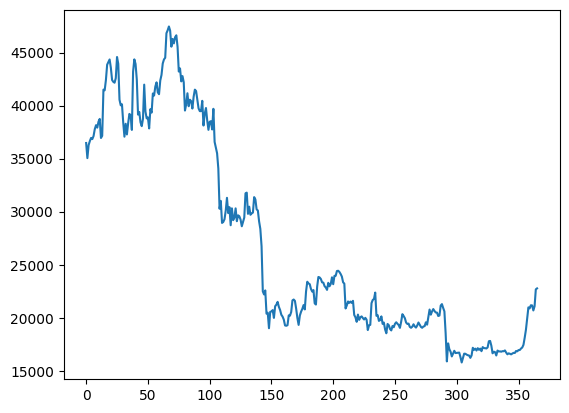

In [88]:
plt.plot(dataset)
plt.show()

### Method for making data and timestep

In [89]:
# lookback -> timestep
def create_dataset(dataset,look_back):
    data_x, data_y = [],[] #data_x is data and data_y is label
    for i in range(len(dataset)-look_back-1): #we want if data be beyond len(sequendatasetce), the command will not continue
        data_x.append(dataset[i:(i+look_back),0])
        data_y.append(dataset[i+look_back,0])
    return np.array(data_x) , np.array(data_y)

### split dataset

In [90]:
train_size = int(len(dataset) * 1)
train , test = dataset[0:train_size,:] , dataset[train_size:len(dataset),:]
print(train.shape)
print(test.shape)

(366, 1)
(0, 1)


In [91]:
train[:3]

array([[36471.589844],
       [35047.359375],
       [36275.734375]], dtype=float128)

### Making data train & test x,y

In [92]:
n_steps = 5 #timestep or look_up

train_x , train_y = create_dataset(train, n_steps)
test_x , test_y = create_dataset(test, n_steps)

In [93]:
print(train_x.shape , train_y.shape)
print(test_x.shape , test_y.shape)

(360, 5) (360,)
(0,) (0,)


In [94]:
train_y[:3]

array([36841.878906, 37128.445313, 37780.714844], dtype=float128)

In [95]:
for i in range(len(train_x)):   
    print(train_x[i],train_y[i])

# print(train_x[:5],'\n')
# print(train_y[:5])

[36471.589844 35047.359375 36275.734375 36654.804688 36950.515625] 36841.878905999998096
[35047.359375 36275.734375 36654.804688 36950.515625 36841.878906] 37128.44531299999653
[36275.734375 36654.804688 36950.515625 36841.878906 37128.445313] 37780.714844000001904
[36654.804688 36950.515625 36841.878906 37128.445313 37780.714844] 38151.917969000001904
[36950.515625 36841.878906 37128.445313 37780.714844 38151.917969] 37920.28125
[36841.878906 37128.445313 37780.714844 38151.917969 37920.28125 ] 38481.765625
[37128.445313 37780.714844 38151.917969 37920.28125  38481.765625] 38743.714844000001904
[37780.714844 38151.917969 37920.28125  38481.765625 38743.714844] 36944.80468799999653
[38151.917969 37920.28125  38481.765625 38743.714844 36944.804688] 37149.265625
[37920.28125  38481.765625 38743.714844 36944.804688 37149.265625] 41501.480469000001904
[38481.765625 38743.714844 36944.804688 37149.265625 41501.480469] 41441.121094000001904
[38743.714844 36944.804688 37149.265625 41501.48046

In [96]:
train_y[:5]

array([36841.878906, 37128.445313, 37780.714844, 38151.917969,
       37920.28125 ], dtype=float128)

In [97]:
df_ = pd.DataFrame(train_x,columns=['x1','x2','x3','x4','x5'])
df_.head(5)

,x1,x2,x3,x4,x5
0,36471.589844,35047.359375,36275.734375,36654.804688,36950.515625
1,35047.359375,36275.734375,36654.804688,36950.515625,36841.878906
2,36275.734375,36654.804688,36950.515625,36841.878906,37128.445313
3,36654.804688,36950.515625,36841.878906,37128.445313,37780.714844
4,36950.515625,36841.878906,37128.445313,37780.714844,38151.917969


In [98]:
df_['y'] = pd.DataFrame(train_y)
df_.head()

,x1,x2,x3,x4,x5,y
0,36471.589844,35047.359375,36275.734375,36654.804688,36950.515625,36841.878906
1,35047.359375,36275.734375,36654.804688,36950.515625,36841.878906,37128.445313
2,36275.734375,36654.804688,36950.515625,36841.878906,37128.445313,37780.714844
3,36654.804688,36950.515625,36841.878906,37128.445313,37780.714844,38151.917969
4,36950.515625,36841.878906,37128.445313,37780.714844,38151.917969,37920.281250


In [99]:
print(df_.shape)
print(df_.dtypes)

(360, 6)
x1    float128
x2    float128
x3    float128
x4    float128
x5    float128
y     float128
dtype: object


In [100]:
df_.to_csv('split_with_timestep.csv')